### Arbitrary Value Imputation

It consist of replacing NaN value by an arbitrary value.This technique was derived from Kaggle Competition.

Arbitrary value should not be more frequently present.

We take the outliers and replace it.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("titanic.csv",usecols=["Survived","Age","Fare"])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

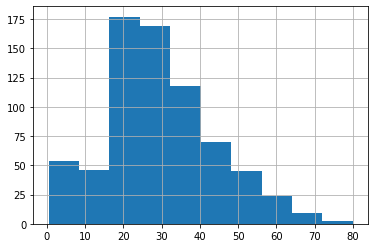

In [4]:
df["Age"].hist()

In [5]:
def impute_nan(df,variable):
    df[variable+"_zeros"] = df[variable].fillna(0)
    df[variable+"_hundred"] = df[variable].fillna(100)

In [6]:
impute_nan(df,"Age")

In [7]:
df.head()

,Survived,Age,Fare,Age_zeros,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


### Advantages And Disadvantages of Arbitrary Value Imputation


**Advantages**
- Easy to implement
- Captures the importance of missingess if there is one

**Disadvantages**
- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

### How to Handle Categorical Missing Value

### Frequent Category Imputation

In [8]:
df = pd.read_csv("house_price.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [9]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [10]:
df.isna().mean() * 100

BsmtQual        2.534247
FireplaceQu    47.260274
GarageType      5.547945
SalePrice       0.000000
dtype: float64

In [11]:
df.isna().mean().sort_values() * 100

SalePrice       0.000000
BsmtQual        2.534247
GarageType      5.547945
FireplaceQu    47.260274
dtype: float64

In [12]:
df.shape

(1460, 4)

In [13]:
df["BsmtQual"].mode()[0]

'TA'

In [14]:
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

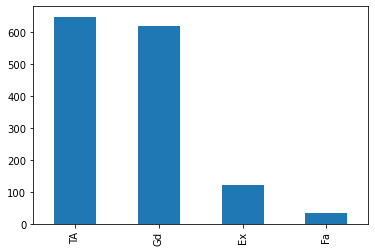

In [15]:
df["BsmtQual"].value_counts().plot(kind="bar")

In [16]:
df["GarageType"].mode()[0]

'Attchd'

In [17]:
df["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:>

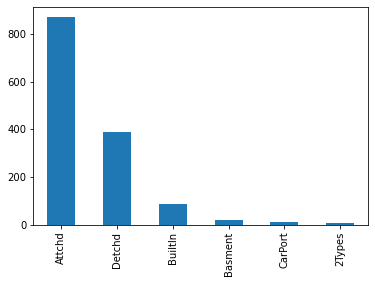

In [18]:
df["GarageType"].value_counts().plot(kind="bar")

In [19]:
df["FireplaceQu"].mode()[0]

'Gd'

In [20]:
def impute_nan(df,variable):
    df[variable+"_mode"] = df[variable].fillna(df[variable].mode()[0])

In [21]:
impute_nan(df,"BsmtQual")

In [22]:
impute_nan(df,"GarageType")

In [23]:
impute_nan(df,"FireplaceQu")

In [24]:
df.sample(15)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_mode,GarageType_mode,FireplaceQu_mode
258,Gd,TA,Attchd,231500,Gd,Attchd,TA
140,TA,Po,NaN,115000,TA,Attchd,Po
51,TA,Gd,Detchd,114500,TA,Detchd,Gd
313,Gd,Gd,Attchd,375000,Gd,Attchd,Gd
1272,TA,NaN,Attchd,137000,TA,Attchd,Gd
374,Gd,Gd,BuiltIn,219500,Gd,BuiltIn,Gd
1320,TA,Gd,Attchd,156500,TA,Attchd,Gd
163,TA,NaN,NaN,103200,TA,Attchd,Gd
764,Gd,Gd,Attchd,270000,Gd,Attchd,Gd
1035,NaN,NaN,Detchd,84000,TA,Detchd,Gd


In [25]:
df.isna().sum()

BsmtQual             37
FireplaceQu         690
GarageType           81
SalePrice             0
BsmtQual_mode         0
GarageType_mode       0
FireplaceQu_mode      0
dtype: int64

### Advantages And Disadvantages of Frequency Category Imputation

**Advantages**
- It is easy to implement.
- It is the fast way of obtaining complete datasets.
- It can be integrated in production (during model deployment).

**Disadvantages**
- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
- It distorts the relation of the most frequent label

### Adding a variable to capture NAN

In [26]:
df = pd.read_csv("house_price.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [27]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [28]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [29]:
def impute_nan(df,variable):
    df[variable+"_na"] = np.where(df[variable].isna(),1,0)
    df[variable] = df[variable].fillna(df[variable].mode()[0])

In [30]:
impute_nan(df,"BsmtQual")

In [31]:
impute_nan(df,"FireplaceQu")

In [32]:
impute_nan(df,"GarageType")

In [33]:
df.sample(15)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_na,FireplaceQu_na,GarageType_na
831,Gd,Gd,Detchd,151000,0,1,0
1402,Gd,Gd,Attchd,193879,0,0,0
864,Ex,Gd,Attchd,250580,0,1,0
71,TA,Gd,Detchd,129500,0,1,0
267,TA,Gd,Detchd,179500,0,0,0
65,Ex,Gd,BuiltIn,317000,0,0,0
1197,TA,Gd,Detchd,144000,0,0,0
432,TA,Gd,Detchd,122500,0,1,0
1070,TA,Gd,Attchd,135000,0,1,0
1365,Gd,Gd,Attchd,216000,0,1,0


### Advantages And Disadvantages of Capturing NAN values with a new feature

**Advantages**
- Easy to implement
- Captures the importance of missing values

**Disadvantages**
- Creating Additional Features(Curse of Dimensionality)

### Suppose if you have more frequent categories, we just replace NAN with a new category

In [34]:
df = pd.read_csv("house_price.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [35]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [36]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [37]:
def impute_nan(df,variable):
    df[variable] = df[variable].fillna("Missing")

In [38]:
impute_nan(df,"BsmtQual")
impute_nan(df,"FireplaceQu")
impute_nan(df,"GarageType")

In [39]:
df.sample(15)

,BsmtQual,FireplaceQu,GarageType,SalePrice
329,TA,Missing,Detchd,78000
729,TA,Missing,Detchd,103000
1401,TA,TA,Attchd,193000
159,Gd,Gd,Attchd,320000
746,Gd,TA,BuiltIn,236000
282,Gd,Gd,Attchd,207500
1290,TA,Gd,Attchd,180500
450,TA,Missing,Detchd,110000
574,TA,Missing,BuiltIn,139000
1008,Ex,Gd,Attchd,240000
